
书籍信息
《scikit-learn 机器学习》

https://www.epubit.com/bookDetails?id=N15172

代码来源
书籍第三章实例及相关代码内容

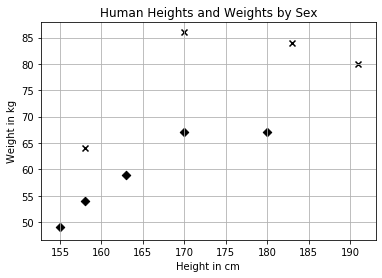

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
# scctter参数 x,y坐标参数，c指颜色， marker指图像形状    

plt.grid(True)
plt.show()

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter

官方 matplotlib.pyplot.scatter参数说明

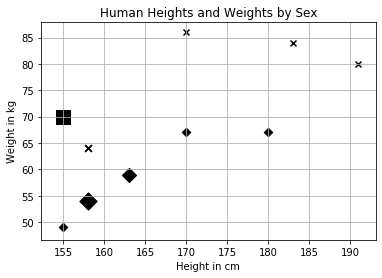

In [2]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=50, c='k', marker='x')
plt.scatter(163, 59, s=100, c='k', marker='D')
plt.scatter(158, 54, s=150, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='s')
# scctter参数 x,y坐标参数，s指大小，c指颜色， marker指图像形状  
plt.grid(True)
plt.show()

https://baike.baidu.com/item/欧几里得度量/1274107?fromtitle=欧几里得距离&fromid=2701459&fr=aladdin

In [3]:
# 欧几里得距离计算 ，在二维和三维空间中的欧氏距离就是两点之间的实际距离
x = np.array([[155, 70]])

# sqrt 根号运算
# np.sum((X_train - x)**2, axis=1) 按行做累加
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances 

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [4]:
(X_train - x)**2

array([[   9,   36],
       [ 225,  256],
       [ 784,  196],
       [1296,  100],
       [   0,  441],
       [  64,  121],
       [ 625,    9],
       [   9,  256],
       [ 225,    9]])

In [5]:
# argsort() 按将数组按照从小到大的顺序排序，并按照对应的索引值输出。，
# 当axis=0时，按列排列；当axis=1时，按行排列。默认按行输出
nearest_neighbor_indices = distances.argsort()
print(nearest_neighbor_indices)
# take(arr, indices)沿轴取数组中的元素。取出arr中，相关的indice索引的值
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices[:3] )
print(nearest_neighbor_genders)

[0 5 8 7 4 1 6 2 3]
['male' 'female' 'female']


In [6]:
from collections import Counter
# counter工具用于支持便捷和快速地计数
# 一个Counter是dict子类，用于计数可哈希的对象。
b = Counter(np.take(y_train, distances.argsort()[:3]))

# 统计counter相关分类，及分类的数据
print(b)
b.most_common(1)

Counter({'female': 2, 'male': 1})


[('female', 2)]

 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html?highlight=labelbinarizer#sklearn.preprocessing.LabelBinarizer

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer() # 标签分类器，映射关系
y_train_binarized = lb.fit_transform(y_train)  #适合标签二值化器并将多类标签转换为二进制标签
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))  # 
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]  # 预测提供的数据的类标签。
print(prediction_binarized)
predicted_label = lb.inverse_transform(prediction_binarized)  # 将二进制标签转换回多类标签
print(predicted_label)

0
['female']


In [9]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0]) #矩阵转置后，取值

predictions_binarized = clf.predict(X_test)  # 把X_test放入已经训练好的KNN 模型中。预测X_test被判断出来的标签
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))


Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [10]:
# 准确率
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [11]:
# 精准率
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [12]:
# 召回率
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [13]:
# F1 分数
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.6666666666666666


In [14]:
# 马修斯相关系数 MCC
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report

In [15]:
# 统一生产，方便进行比对
from sklearn.metrics import classification_report
a = ['male','female']
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male','female']))

              precision    recall  f1-score   support

        male       0.67      1.00      0.80         2
      female       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([
    [158, 64, 1],
    [170, 86, 1],
    [183, 84, 1],
    [191, 80, 1],
    [155, 49, 0],
    [163, 59, 0],
    [180, 67, 0],
    [158, 54, 0],
    [170, 67, 0]
])
y_train = [7, 12, 29, 18, 11, 16, 29, 22, 36]

X_test = np.array([
    [160, 66, 1],
    [196, 87, 1],
    [168, 68, 0],
    [177, 74, 0]
])
y_test = [9, 13, 26, 21]

K = 1
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))
predictions

array([ 7., 18., 36., 29.])

In [17]:
# 模型越好：r2→1

# 模型越差：r2→0
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

-0.09193776520509189


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [160, 1],
    [196, 1],
    [168, 0],
    [177, 0]
])
y_test = [66, 87, 68, 74]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)

Predicted weights: [59.         77.         70.66666667 72.66666667]
Actual weights: [66, 87, 68, 74]


In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.41250645994832036
